# Sebelum Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data mentah
df_raw = pd.read_csv('stroke_prediction_dataset.csv')
print("5 baris pertama data mentah:")
print(df_raw.head())

5 baris pertama data mentah:
   Patient ID       Patient Name  Age Gender  Hypertension  Heart Disease  \
0       18153    Mamooty Khurana   56   Male             0              1   
1       62749  Kaira Subramaniam   80   Male             0              0   
2       32145      Dhanush Balan   26   Male             1              1   
3        6154        Ivana Baral   73   Male             0              0   
4       48973  Darshit Jayaraman   51   Male             1              1   

  Marital Status      Work Type Residence Type  Average Glucose Level  ...  \
0        Married  Self-employed          Rural                 130.91  ...   
1         Single  Self-employed          Urban                 183.73  ...   
2        Married   Never Worked          Rural                 189.00  ...   
3        Married   Never Worked          Urban                 185.29  ...   
4       Divorced  Self-employed          Urban                 177.34  ...   

     Alcohol Intake Physical Activity S

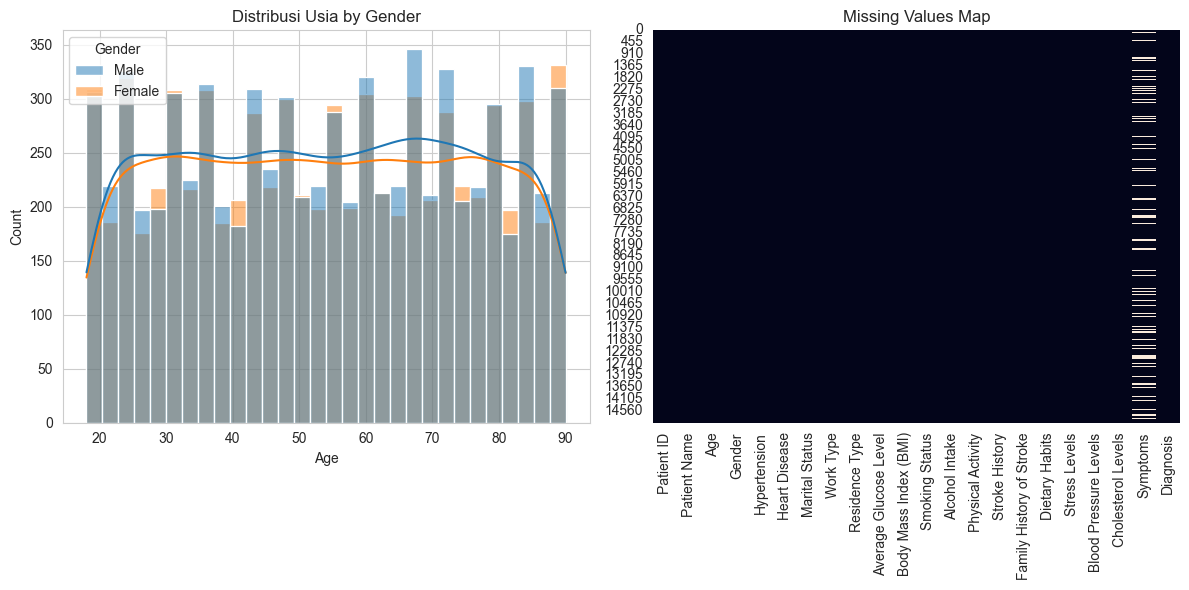

In [2]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# a. Distribusi usia dan gender
plt.subplot(1, 2, 1)
sns.histplot(data=df_raw, x='Age', hue='Gender', bins=30, kde=True)
plt.title('Distribusi Usia by Gender')

# b. Cek missing values
plt.subplot(1, 2, 2)
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title('Missing Values Map')
plt.tight_layout()
plt.show()

# Sesudah Preparation

In [3]:
df_clean = pd.read_csv('stroke_final_preprocessed.csv')
print("\n5 baris pertama data clean:")
print(df_clean.head())


5 baris pertama data clean:
        Age  Hypertension  Heart Disease  Average Glucose Level  \
0  0.095539             0              1               0.032652   
1  1.237525             0              0               1.336816   
2 -1.331945             1              1               1.466936   
3  0.904446             0              0               1.375333   
4 -0.142375             1              1               1.179042   

   Body Mass Index (BMI)  Smoking Status  Systolic BP  Diastolic BP       HDL  \
0              -0.715312               0     0.186153      1.568350  0.871312   
1               0.698604               0     0.413382      0.413105  0.533617   
2              -0.999481               1     0.716355      0.820839  0.263461   
3              -0.004195               0     1.473788     -0.266451  1.006390   
4               0.212051               0    -0.533408      0.684927  0.668695   

        LDL  Total_Symptoms  Diagnosis  
0  0.211737               2          1  

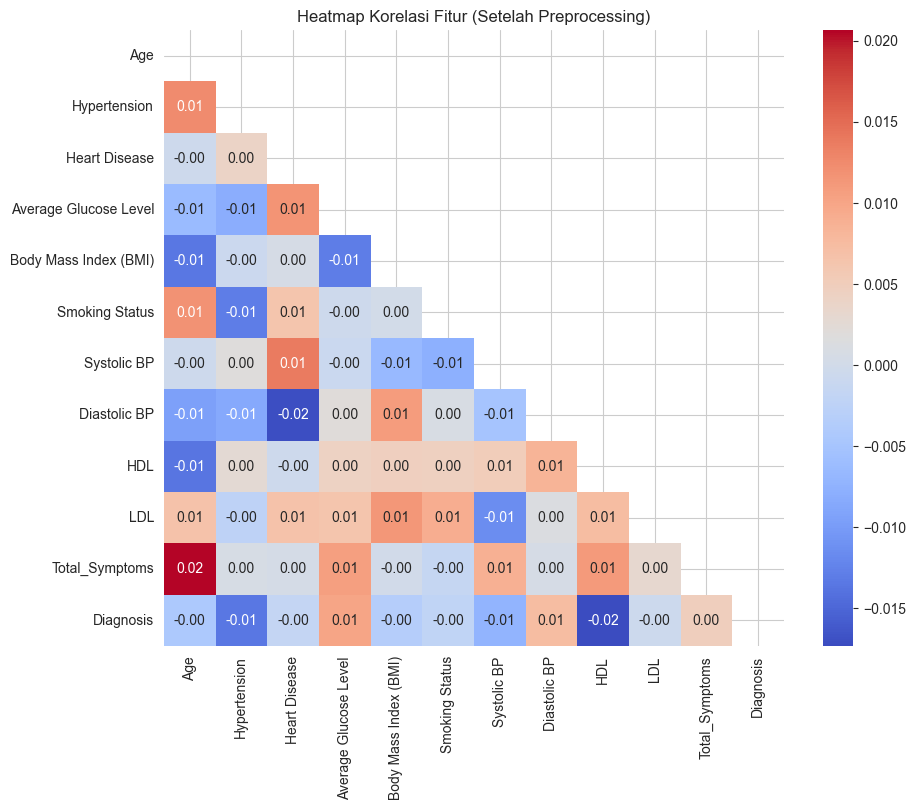

C:\Users\acer\AppData\Local\Temp\ipykernel_18028\786581981.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Diagnosis', y=col, palette='pastel')
C:\Users\acer\AppData\Local\Temp\ipykernel_18028\786581981.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Diagnosis', y=col, palette='pastel')
C:\Users\acer\AppData\Local\Temp\ipykernel_18028\786581981.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Diagnosis', y=col, palette='pastel')


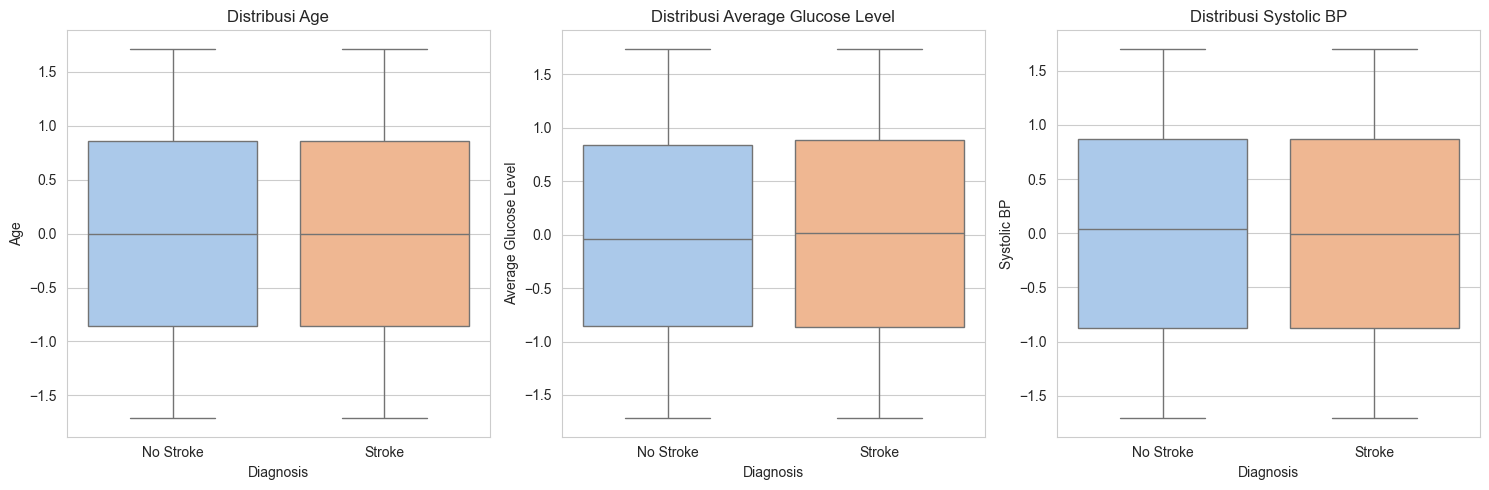

In [5]:
# a. Korelasi fitur numerik
import numpy as np

plt.figure(figsize=(10, 8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(np.ones_like(corr)))
plt.title('Heatmap Korelasi Fitur (Setelah Preprocessing)')
plt.show()

# b. Distribusi fitur penting vs stroke
plt.figure(figsize=(15, 5))
features = ['Age', 'Average Glucose Level', 'Systolic BP']
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_clean, x='Diagnosis', y=col, palette='pastel')
    plt.title(f'Distribusi {col}')
    plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()